# Gráficas (_librería **matplotlib**_)

## Gráficas en 2-D
### Ejercicio 1
La distancia que recorre un proyectil cuando se dispara a un ángulo $\theta$ es función del tiempo y se puede dividir en distancias horizontal y vertical de acuerdo con las  fórmulas:

$$\text{Horizontal}(t) = t v_0 \cos{\theta}$$
$$\text{Vertical}(t) = t v_0 \sin{\theta} - \frac{1}{2}gt^2$$

donde $\text{Horizontal}$ es la distancia recorrida en la dirección $x$, $\text{Vertical}$ es la distancia recorrida en la dirección $y$, $v_0$ es la velocidad inicial, $g$ es la aceleración debida a la gravedad, $9.8\ m/s^2$ y $t$ es el tiempo en segundos.

Suponga que el proyectil descrito se dispara con una velocidad inicial de 100 m/s y un ángulo de lanzamiento de 45º. Encuentre la distancia recorrida tanto horizontal como verticalmente (en las direcciones $x$ y $y$) para tiempos desde 0 hasta 20 segundos.

1. Realizar la gráfica de la distancia horizontal contra tiempo.
2. Realizar la gráfica de la distancia vertical contra el tiempo.

Añadir título, etiquetas, cuadrícula, etc.; a todas las gráficas.

*Ejercicio modificado de Moore, 2007.*

### Solución

In [10]:
import matplotlib.pyplot as plt
import numpy as np

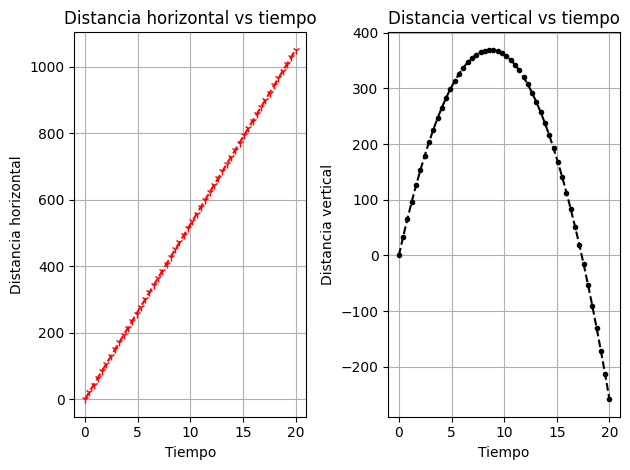

In [ ]:
# Entrdada
g = 9.8 
v0 = 100 
angle = 45

t = np.linspace(0, 20)
distancia_horizontal = t * v0 * np.cos(angle)
distancia_vertical = t * v0 * np.sin(angle) - 0.5 * g * t**2

#Gráficos

fig1 = plt.figure()

plt.subplot(1,2,1)
plt.plot(t, distancia_horizontal, "r1--")
plt.grid()
plt.title("Distancia horizontal vs tiempo")
plt.ylabel("Distancia horizontal")
plt.xlabel("Tiempo")


plt.subplot(1,2,2)
plt.plot(t, distancia_vertical, "k.--")
plt.grid()
plt.title("Distancia vertical vs tiempo")
plt.ylabel("Distancia vertical")
plt.xlabel("Tiempo")

plt.tight_layout()
# Salidas

### Ejercicio 2
La deformación de muchos metales cambia sus propiedades físicas. En un proceso llamado trabajo en frío, el metal se deforma intencionalmente para hacerlo más fuerte. Los siguientes datos tabulan tanto la fortaleza como la ductilidad de un metal que se  trabajó en frío a diferentes grados:

<figure style="text-align: center;">
  <div><strong>Fig. 1.</strong> Datos del proceso trabajo en frío. </div>
  <img src="markdown_resources\4.png" style="width: 45%; height: auto;">
  <figcaption>Tomado de MATLAB para ingenieros de Holly Moore.</figcaption>
</figure>

Graficar estos datos y analizar el resultado.

### Solución

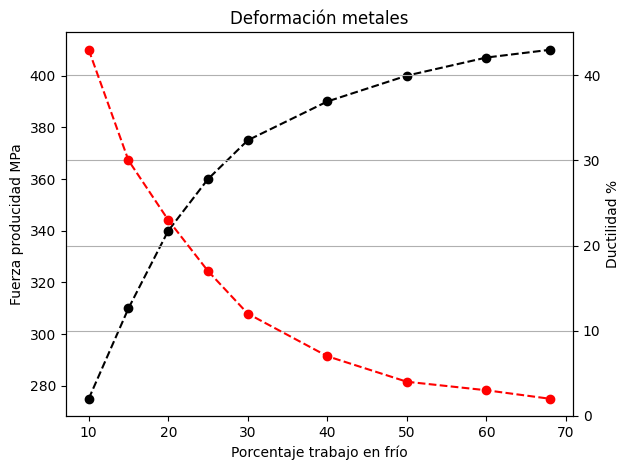

In [49]:
# Entrada
porcentaje_frío = np.array([[10], [15], [20], [25], [30], [40], [50], [60], [68]])

fuerza_producida = np.array([[275], [310], [340], [360], [375], [390], [400], [407], [410]])
ductilidad = np.array([[43], [30], [23], [17], [12], [7], [4], [3], [2]])

#Entrada
fig1, ax1 = plt.subplots()
ax1.plot(porcentaje_frío, fuerza_producida, "ko--")
ax1.set_ylabel("Fuerza producidad MPa")


ax2 = ax1.twinx()
ax2.plot(porcentaje_frío, ductilidad, "ro--")
ax2.set_ylabel("Ductilidad %")

ax1.set(
    title = "Deformación metales",
    xlabel = "Porcentaje trabajo en frío"
)
fig1.tight_layout()
plt.grid()


### Ejercicio 3
En la figura adjunta se muestra una viga apoyada sobre soportes, sometida a una carga  con distribución constante sobre la mitad de su longitud.

<figure style="text-align: center;">
  <div><strong>Fig. 2.</strong> Viga apoyada sobre soportes. </div>
  <img src="markdown_resources\5.png" style="width: 45%; height: auto;">
  <figcaption>Tomado de MATLAB: Introducción con ejemplos prácticos de Amos Gilat.</figcaption>
</figure>

En este caso, la deflexión $y$ en función de $x$ viene dada por las ecuaciones:

$$y = \frac{-wx}{384EI} (16x^3 - 24Lx^2 + 9L^3) \text{ para } 0 \le x \le \frac{L}{2}$$
$$y = \frac{-wx}{384EI} (8x^3 - 24Lx^2 + 17L^2x - L^3) \text{ para } \frac{L}{2} \le x \le L$$

donde $E$ es el módulo de elasticidad, $I$ el momento de inercia y $L$ la longitud de la viga. La viga que se muestra en la figura posee las siguientes características: $L =$ 20 m, $E = 200 \times 10^9$ Pa (acero), $I = 348 \times 10^{-6}\text{ m}^4$ y $w = 5 \times 10^3 \text{ N/m}$.

Represente gráficamente la deflexión de la viga $y$ en función de $x$.

*Ejercicio tomado de Gilat, 2005.*

### Solución

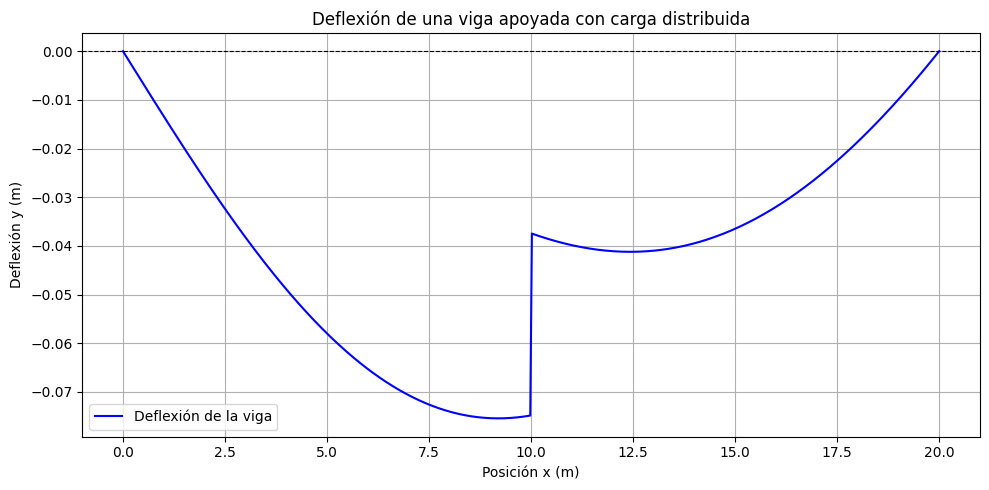

In [64]:
# Entrada
elasticidad  = 200e9    #[E - Pa]
inercia = 348e-6        #[I - m4]
longitud_viga = 20      #[L-m]
w = 5e3                 #[N/m]

# Entrada Opcional
E = elasticidad
I = inercia
L = longitud_viga


def deflexion(x):
    if x <= L/2:
        return (-w*x/(384*E*I)) * (16*x**3 - 24*L*x**2 + 9*L**3)
    else:
        return (-w*x/(384*E*I)) * (8*x**3 - 24*L*x**2 + 17*L**2*x - L**3)
    
x_vals = np.linspace(0, L, 500)
y_vals = np.array([deflexion(x) for x in x_vals])

# Procdeimiento
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label="Deflexión de la viga", color='b')
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)  # Línea base en y=0
plt.xlabel("Posición x (m)")
plt.ylabel("Deflexión y (m)")
plt.title("Deflexión de una viga apoyada con carga distribuida")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()